In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [137]:
data_set=pd.read_csv('healthinsurance.csv')

In [138]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [139]:
data_set.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [140]:
data_set['sex'].unique()

array(['female', 'male'], dtype=object)

In [141]:
data_set['sex']=data_set['sex'].map({'female':0,'male':1})

In [142]:
data_set.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [143]:
data_set['smoker']=data_set['smoker'].map({'no':0,'yes':1})

In [144]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [145]:
data_set['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [146]:
data_set['region']=data_set['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [147]:
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler=StandardScaler()
scaler.fit(data_set)

StandardScaler()

In [150]:
scaled_data=scaler.transform(data_set)

In [151]:
scaled_data

array([[-1.43876426, -1.0105187 , -0.45332   , ...,  1.97058663,
        -1.34390459,  0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.5074631 ,
        -0.43849455, -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.5074631 ,
        -0.43849455, -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.5074631 ,
        -0.43849455, -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.5074631 ,
        -1.34390459, -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.97058663,
         0.46691549,  1.31105347]])

In [152]:
from sklearn.decomposition import PCA

In [153]:
pca=PCA(n_components=2)

In [154]:
pca.fit(scaled_data)

PCA(n_components=2)

In [155]:
x_pca=pca.transform(scaled_data)

In [156]:
scaled_data.shape

(1338, 7)

In [157]:
x_pca.shape

(1338, 2)

In [158]:
scaled_data

array([[-1.43876426, -1.0105187 , -0.45332   , ...,  1.97058663,
        -1.34390459,  0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.5074631 ,
        -0.43849455, -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.5074631 ,
        -0.43849455, -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.5074631 ,
        -0.43849455, -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.5074631 ,
        -1.34390459, -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.97058663,
         0.46691549,  1.31105347]])

In [159]:
x_pca

array([[ 0.86550954,  0.81208251],
       [-1.13864807, -0.24489118],
       [-0.7053086 , -0.64142346],
       ...,
       [-1.31718035, -0.46139248],
       [-1.58050269,  0.10570459],
       [ 2.28660847,  0.72035023]])

In [160]:
principal_df=pd.DataFrame(x_pca,columns=['P1','P2'],)

In [161]:
principal_df.head()


,P1,P2
0,0.865510,0.812083
1,-1.138648,-0.244891
2,-0.705309,-0.641423
3,-0.167003,1.283676
4,-1.025671,0.561317


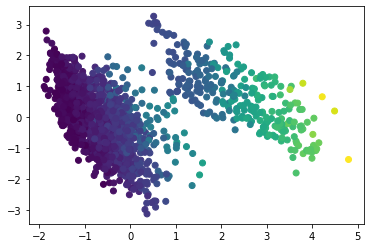

In [162]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=data_set['charges'])


In [163]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [164]:
y=data_set['charges']


In [165]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=0)

In [166]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 2), (268, 2), (1070,), (268,))

In [167]:
from sklearn import metrics

In [168]:
model=regressor.fit(x_train,y_train)

In [169]:
#Training on prediction data
x_train_predict=regressor.predict(x_train)
x_train_predict.shape
print('Mean square error is:',metrics.mean_squared_error(y_train,x_train_predict))

Mean square error is: 11265409.418456119


In [170]:
print('R squared value is :',metrics.r2_score(y_train,x_train_predict))

R squared value is : 0.9214221112450824


In [171]:
x_test_predict=regressor.predict(x_test)

In [172]:
print('Mean square error is:',metrics.mean_squared_error(y_test,x_test_predict))

Mean square error is: 9660471.686458267


In [173]:
print('R squared value is:',metrics.r2_score(y_test,x_test_predict))

R squared value is: 0.9392919375742537


In [174]:
regressor.fit(x_train,y_train)

LinearRegression()

In [175]:
input_data=[-1.13864807, -0.24489118]
x_pca=np.array(input_data)
x_pca=x_pca.reshape(1,-1)
value=regressor.predict(x_pca)
print('The insuarance cost is:',value[:])

The insuarance cost is: [3449.48951393]
